In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import math
# import matplotlib.pyplot as plt
# import numpy as np


In [7]:
def f(h):
    return h**3 - 10*h + 5*math.exp(-h/2) - 2

In [8]:
def bisection_method(xl, xu, es_threshold=1, max_iterations=100, verbose=True):
    
    if f(xl) * f(xu) >= 0:
        raise ValueError("Error: f(xl) and f(xu) must have opposite signs")
    iteration = 0
    results = []
    xr_old = 0
    converged = False
    
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xl':<15} {'xu':<15} {'xr (root)':<15} {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    
    while iteration < max_iterations:
        iteration += 1
        xr = (xl + xu) / 2.0 
        f_xr = f(xr)
        if iteration > 1:
            ea = abs((xr - xr_old) / xr) * 100 if xr != 0 else 0
        else:
            ea = float('inf')
           
        
        results.append({
            'Iteration': iteration,
            'xl': xl,
            'xu': xu, 
            'xr': xr,
            'f(xr)': f_xr,
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        
        if verbose:
            ea_str = f"{ea:.10f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {xl:<15.10f} {xu:<15.10f} {xr:<15.10f} {f_xr:<15.10f} {ea_str:<12}")
        
        
        if iteration > 1 and ea < es_threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {es_threshold}%")
            break
        
        
        if f(xl) * f_xr < 0:
            xu = xr  
        else:
            xl = xr  
        
        xr_old = xr
    
    if not converged and verbose:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return results, xr


In [9]:
xl_initial = 0.1
xu_initial = 0.4
stopping_criterion = 1

results, final_root = bisection_method(xl_initial, xu_initial, stopping_criterion)

print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")


Iter  xl              xu              xr (root)       f(xr)           εa (%)      
1     0.1000000000    0.4000000000    0.2500000000    -0.0718904871   N/A         
2     0.1000000000    0.2500000000    0.1750000000    0.8364537333    42.8571428571
3     0.1750000000    0.2500000000    0.2125000000    0.3805948032    17.6470588235
4     0.2125000000    0.2500000000    0.2312500000    0.1539125257    8.1081081081
5     0.2312500000    0.2500000000    0.2406250000    0.0408988684    3.8961038961
6     0.2406250000    0.2500000000    0.2453125000    -0.0155241275   1.9108280255
7     0.2406250000    0.2453125000    0.2429687500    0.0126803260    0.9646302251
CONVERGENCE ACHIEVED!
Approximate relative error = 0.9646302251% < 1%

FINAL RESULT:
Root: x = 0.2429687500
f(x) = 0.0126803260
Total iterations: 7


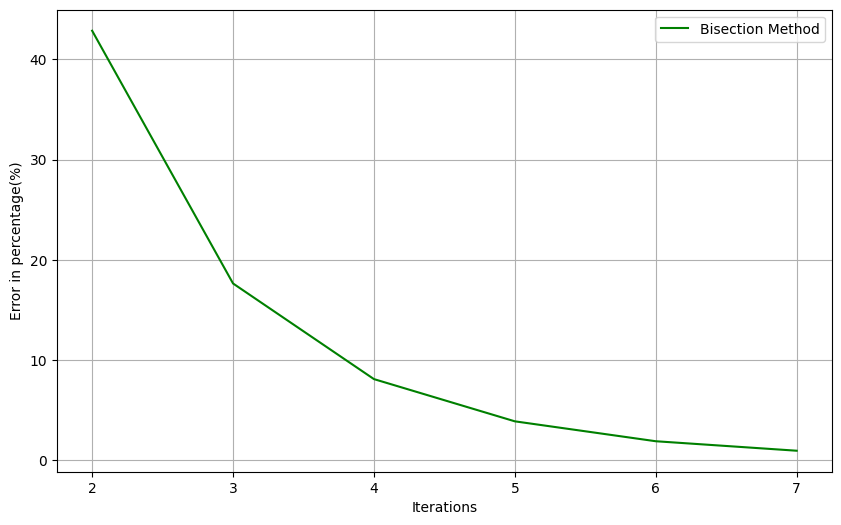

In [10]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='green',label="Bisection Method")
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()